In [84]:
import pandas as pd
from glob import glob

In [85]:
all_excel_files = glob("../results/gc/predictors*.xlsx")

# read all Excel files at once
df = pd.concat(pd.read_excel(excel_file) for excel_file in all_excel_files)

In [86]:
auxiliary_metrics = ['model', 'accuracy', 'balanced_accuracy', 'f1', 'f1_macro', 'f1_micro', 'roc_auc', 'average_precision', 'precision', 'recall', 'log_loss']

In [105]:
a = df[df['roc_auc'].notnull()].sort_values('roc_auc', ascending=False).groupby('model').head(5)[['model', 'roc_auc']]

# top_df = df[df['roc_auc'].notnull()].groupby('model').max().sort_values('roc_auc', ascending=False).head(10)[auxiliary_metrics]

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

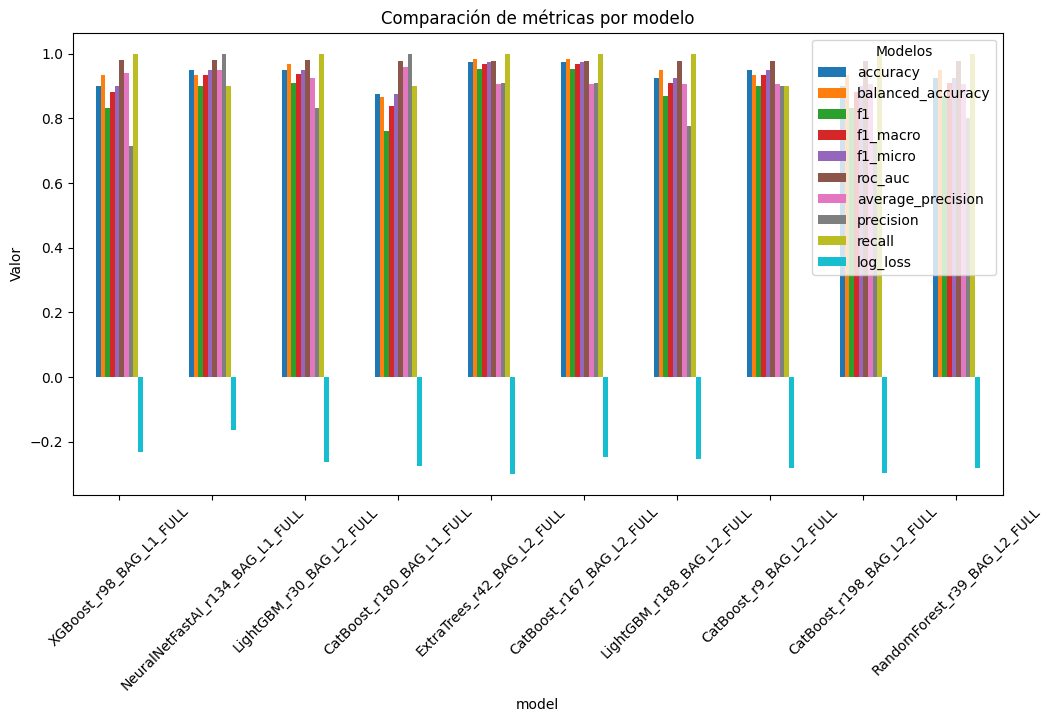

In [68]:
# Plot de barras para comparación de métricas
top_df.plot(kind='bar', figsize=(12, 6))
plt.title("Comparación de métricas por modelo")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title="Modelos")
plt.show()

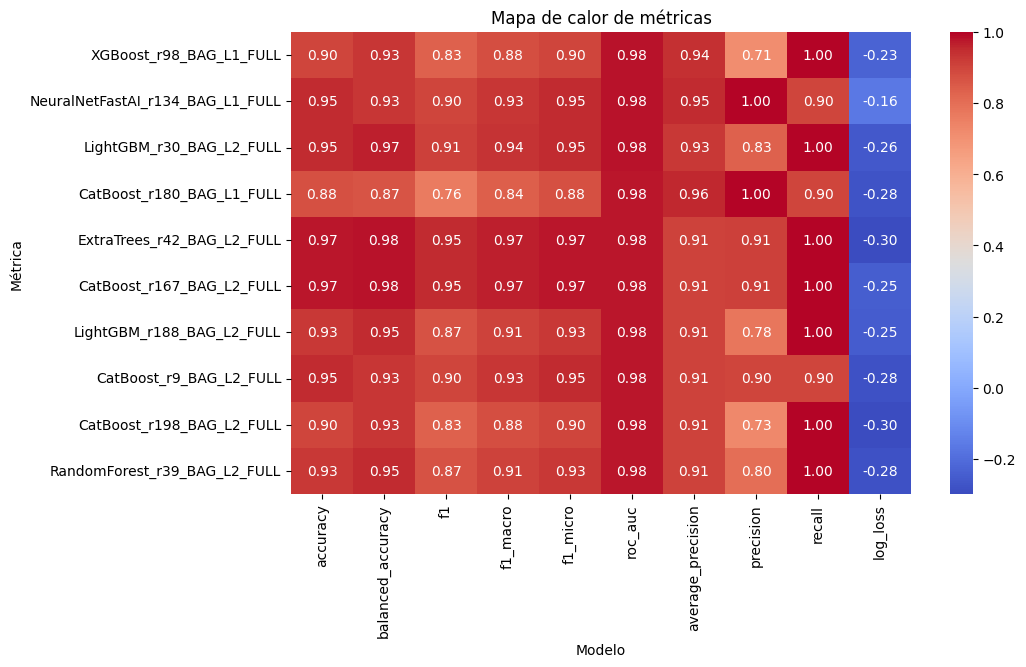

In [69]:
# Heatmap para visualización de métricas
plt.figure(figsize=(10, 6))
sns.heatmap(top_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de métricas")
plt.xlabel("Modelo")
plt.ylabel("Métrica")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="model", y="roc_auc", data=a, palette="coolwarm")
plt.title("Distribución de roc_auc por modelo")
plt.xlabel("Modelo")
plt.ylabel("roc_auc")
plt.show()


C:\Users\jgala\AppData\Local\Temp\ipykernel_11296\2311118220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="model", y="roc_auc", data=a, palette="coolwarm")


C:\Users\jgala\AppData\Local\Temp\ipykernel_11296\2255808640.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="model", y="roc_auc", data=a, ci="sd", palette="viridis")
C:\Users\jgala\AppData\Local\Temp\ipykernel_11296\2255808640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y="roc_auc", data=a, ci="sd", palette="viridis")


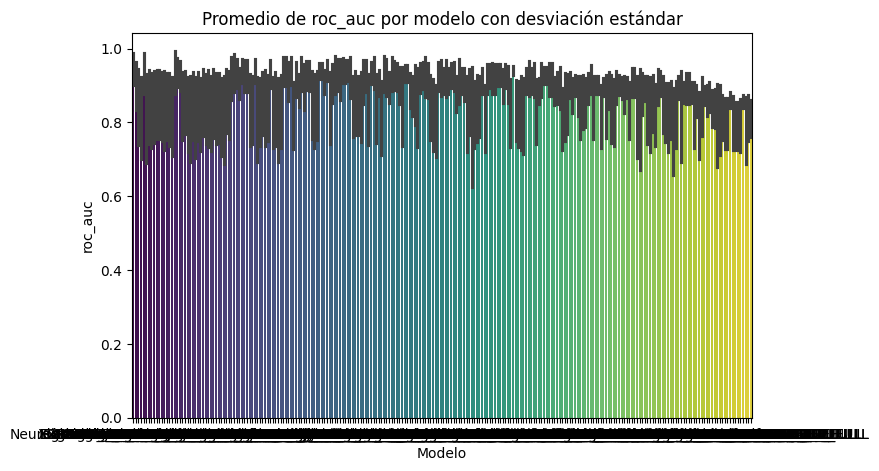

In [106]:
plt.figure(figsize=(8, 5))
sns.barplot(x="model", y="roc_auc", data=a, ci="sd", palette="viridis")
plt.title("Promedio de roc_auc por modelo con desviación estándar")
plt.xlabel("Modelo")
plt.ylabel("roc_auc")
plt.show()
